<a href="https://colab.research.google.com/github/pabloga44/TFG/blob/main/Model_1param.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo para 1 parámetro (ángulo)

##Librerías

In [1]:
import sys
import os
import matplotlib.pyplot as plt # for plotting
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/pabloga44/TFG

Cloning into 'TFG'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 130 (delta 69), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (130/130), 1.68 MiB | 5.79 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [4]:
sys.path.insert(0,'/content/TFG')

In [5]:
#Librerias de GitHub
import main as mn
import paint as pt

##Importar datos

In [6]:
InPath = '/content/TFG/data/Input_1param.txt'
OutPath = '/content/TFG/data/Output_1param.txt'
FrecPath = '/content/TFG/data/Frequencies.txt'

l,x,y = mn.get_data_1param(FrecPath,InPath,OutPath,clean=True)


print(x)

[0.   0.02 0.03 0.05 0.06 0.08 0.1  0.11 0.13 0.14 0.16 0.17 0.19 0.21
 0.22 0.24 0.25 0.27 0.29 0.3  0.32 0.33 0.35 0.36 0.38 0.4  0.41 0.43
 0.44 0.46 0.48 0.49 0.51 0.52 0.54 0.56 0.57 0.59 0.6  0.62 0.63 0.65
 0.67 0.68 0.7  0.71 0.73 0.75 0.76 0.78 0.79 0.81 0.83 0.84 0.86 0.87
 0.89 0.9  0.92 0.94 0.95 0.97 0.98 1.   1.02 1.03 1.05 1.06 1.08 1.09
 1.11 1.13 1.14 1.16 1.17 1.19 1.21 1.22 1.24 1.25 1.27 1.29 1.3  1.32
 1.33 1.35 1.36 1.38 1.4  1.41 1.43 1.44 1.46 1.48 1.49 1.51 1.52 1.54
 1.55 1.57]


###Ploteamos algunas

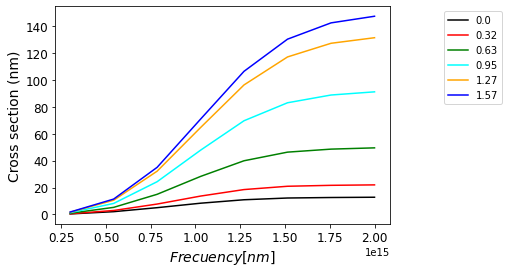

In [7]:
pt.paint_spectra(l,x,y)

###Separación Train Validation Test

In [8]:
x_train,x_validation,x_test,y_train,y_validation,y_test=mn.split_data(x,y)

##Crear y entrenar modelo

In [30]:
model,history= mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='sigmoid',lr=0.0006,num_epochs=8000)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 150)               300       
_________________________________________________________________
dense_109 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_110 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_111 (Dense)            (None, 8)                 1208      
Total params: 46,808
Trainable params: 46,808
Non-trainable params: 0
_________________________________________________________________


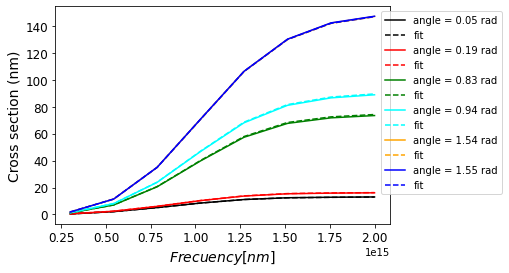

In [31]:
pt.paint_predictions(model,l,x_test,y_test)

##Evaluar modelo

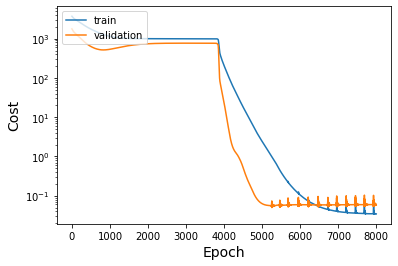

In [32]:
pt.paint_costs(history)

##Creamos y guardamos modelos para distintas activations

In [10]:
pathsave_Act='/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Activations2'

epochs = 20000

# Sigmoid
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='sigmoid',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Act,key='sigmoid')

# Relu
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='relu',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Act,key='relu')

# Tanh
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='tanh',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Act,key='tanh')

# Softsign
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='softsign',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Act,key='softsign')

# Softplus
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='softplus',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Act,key='softplus')

# Softmax
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='softmax',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Act,key='softmax')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1208      
Total params: 46,808
Trainable params: 46,808
Non-trainable params: 0
_________________________________________________________________
Model saved correctly!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 150)               300       
_______

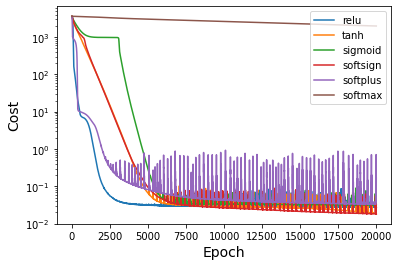

In [10]:
pt.paint_training('/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Activations',['relu','tanh','sigmoid','softsign','softplus','softmax'])

##Creamos y guardamos modelos para distintos optimizers

In [14]:
pathsave_Opt='/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Optimizers2'

epochs = 15000

# SGD
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='SGD',actfun='sigmoid',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Opt,key='SGD')

# Adagrad
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adagrad',actfun='sigmoid',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Opt,key='Adagrad')

# RMSprop
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='RMSprop',actfun='sigmoid',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Opt,key='RMSprop')

# Nadam
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Opt,key='Nadam')

# Adam
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Adam',actfun='sigmoid',num_epochs=epochs)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Opt,key='Adam')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 150)               300       
_________________________________________________________________
dense_29 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_30 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 1208      
Total params: 46,808
Trainable params: 46,808
Non-trainable params: 0
_________________________________________________________________
Model saved correctly!
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 150)               300       
_____

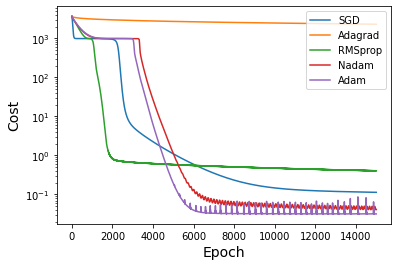

In [15]:
pt.paint_training(pathsave_Opt,['SGD','Adagrad','RMSprop','Nadam','Adam'])

##Nuevas funciones (Pruebas)

In [ ]:
def paint_predictions(model,l,x,y,save=False,route='',key=''):
    # Predict the spectra
    size = x.shape[0]

    input = np.array([x[0]])
    output1 = model.predict(input)
    input = np.array([x[int(size/5.)]])
    output2 = model.predict(input)
    input = np.array([x[int(size/5.*2)]])
    output3 = model.predict(input)
    input = np.array([x[int(size/5.*3)]])
    output4 = model.predict(input)
    input = np.array([x[int(size/5.*4)]])
    output5 = model.predict(input)
    input = np.array([x[size-1]])
    output6 = model.predict(input)

    plt.clf()

    # Plot the fits
    plt.figure(1)
    plt.plot(l, y[0], color='black', label='angle = '+str(x[0])+' rad')
    plt.plot(l, output1.T, color='black', linestyle='--', marker='o', label='fit')
    plt.plot(l, y[int(size/5.),:], color='red', label='angle = '+str(x[int(size/5.)])+' rad')
    plt.plot(l, output2.T, color='red', linestyle='--', marker='o', label='fit')
    plt.plot(l, y[int(size/5.*2),:], color='green', label='angle = '+str(x[int(size/5.*2)])+' rad')
    plt.plot(l, output3.T, color='green', linestyle='--', marker='o', label='fit')
    plt.plot(l, y[int(size/5.*3),:], color='cyan', label='angle = '+str(x[int(size/5.*3)])+' rad')
    plt.plot(l, output4.T, color='cyan', linestyle='--', marker='o', label='fit')
    plt.plot(l, y[int(size/5.*4),:], color='orange', label='angle = '+str(x[int(size/5.*4)])+' rad')
    plt.plot(l, output5.T, color='orange', linestyle='--', marker='o', label='fit')
    plt.plot(l, y[size-1,:], color='blue', label='angle = '+str(x[size-1])+' rad')
    plt.plot(l, output6.T, color='blue', linestyle='--', marker='o', label='fit')

    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))
    plt.xlabel("$Frecuency [nm]$", fontsize=14)
    plt.ylabel("Cross section (nm)", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    if save:
        plt.savefig(str(route)+'/train'+str(key)+'.pdf')

    plt.show()

##Creamos y guardamos modelos para distintos learning rates

In [26]:
pathsave_Lr = '/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Learning_rate'

epochs = 15000

# 1e-3
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,lr=1e-3)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Lr,key='1e-3')

# 5e-4
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,lr=5e-4)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Lr,key='5e-4')

# 1e-4
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,lr=1e-4)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Lr,key='1e-4')

# 5e-5
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,lr=5e-5)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Lr,key='5e-5')

# 1e-5
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,lr=1e-5)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Lr,key='1e-5')

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 150)               300       
_________________________________________________________________
dense_90 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_91 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 1208      
Total params: 46,808
Trainable params: 46,808
Non-trainable params: 0
_________________________________________________________________
Model saved correctly!
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 150)               300       
___

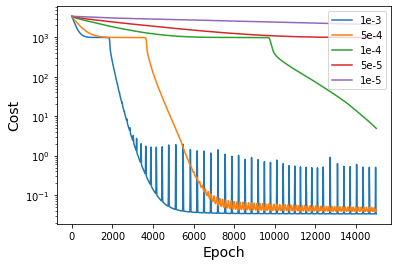

In [27]:
pt.paint_training(pathsave_Lr,['1e-3','5e-4','1e-4','5e-5','1e-5'])

##Creamos y guardamos modelos para distinto numero de hidden layers

In [28]:
pathsave_Nhl = '/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Number_layers'

epochs = 15000

# 1
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,hidden=1)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nhl,key='1hid')

# 2
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,hidden=2)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nhl,key='2hid')

# 3
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,hidden=3)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nhl,key='3hid')

# 4
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,hidden=4)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nhl,key='4hid')

# 5
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,hidden=5)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nhl,key='5hid')

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 150)               300       
_________________________________________________________________
dense_110 (Dense)            (None, 8)                 1208      
Total params: 1,508
Trainable params: 1,508
Non-trainable params: 0
_________________________________________________________________
Model saved correctly!
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 150)               300       
_________________________________________________________________
dense_112 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_113 (Dense)            (None, 8)                 1208      
Total

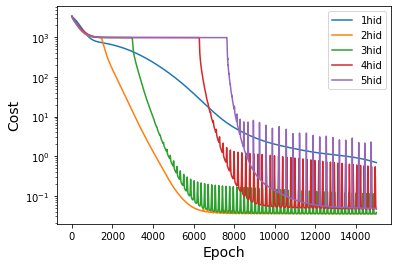

In [29]:
pt.paint_training(pathsave_Nhl,['1hid','2hid','3hid','4hid','5hid'])

##Creamos y guardamos modelos para distinto numero de neuronas por capa interna

In [30]:
pathsave_Nn = '/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Number_neurons'

epochs = 15000

# 100n
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,neurons=100)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nn,key='100n')

# 150n
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,neurons=150)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nn,key='150n')

# 200n
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,neurons=200)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Nn,key='200n')

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 100)               200       
_________________________________________________________________
dense_130 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_131 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_132 (Dense)            (None, 8)                 808       
Total params: 21,208
Trainable params: 21,208
Non-trainable params: 0
_________________________________________________________________
Model saved correctly!
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 150)               300       
___

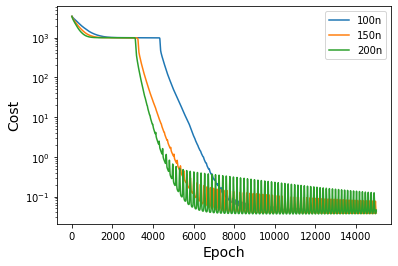

In [31]:
pt.paint_training(pathsave_Nn,['100n','150n','200n'])

##Creamos y guardamos modelos para distinto batch size

In [33]:
pathsave_Bs = '/content/drive/MyDrive/Colab Notebooks/TFG/Modelos/Batch_size'

epochs = 15000

# B1
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,batch=1)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Bs,key='B1')

# B20
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,batch=20)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Bs,key='B20')

# B50
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,batch=50)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Bs,key='B50')

# B80
model,history=mn.train_model(x_train,x_validation,y_train,y_validation,optimizer='Nadam',actfun='sigmoid',num_epochs=epochs,batch=80)
mn.save_model(model,history,l,x_train,x_validation,x_test,y_train,y_validation,y_test,route=pathsave_Bs,key='B80')

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 150)               300       
_________________________________________________________________
dense_146 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_147 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_148 (Dense)            (None, 8)                 1208      
Total params: 46,808
Trainable params: 46,808
Non-trainable params: 0
_________________________________________________________________
Model saved correctly!
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 150)               300       
___

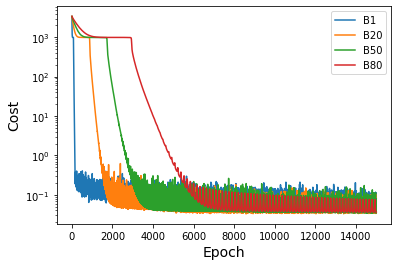

In [34]:
pt.paint_training(pathsave_Bs,['B1','B20','B50','B80'])